In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

from modules.csvLoader import csvLoader

%load_ext autoreload
%autoreload 2

In [2]:
appartement_filtre = csvLoader.load('appartement_filtre')
appartement_filtre = appartement_filtre[['Valeur fonciere','Nombre pieces principales','Surface', 'Prix metre carre']]

print(len(appartement_filtre))

Successfully loaded  appartement_filtre.csv
77452


In [3]:
print(len(appartement_filtre))
print(appartement_filtre.isnull().sum())

77452
Valeur fonciere              0
Nombre pieces principales    0
Surface                      0
Prix metre carre             0
dtype: int64


## Etude de la correlation

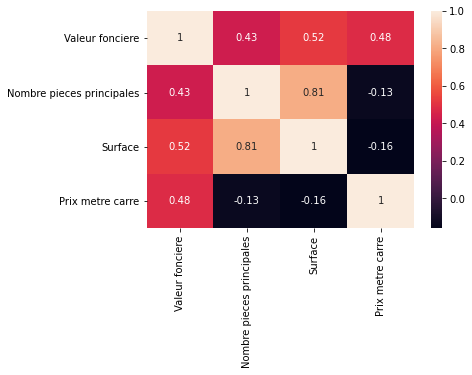

In [4]:
matrice_corr = appartement_filtre.corr().round(2)
sns.heatmap(data=matrice_corr, annot=True)
del(matrice_corr)

## Construction du jeu d'entrainement et de test

In [5]:
X = pd.DataFrame(np.c_[appartement_filtre['Nombre pieces principales'],appartement_filtre['Surface'], appartement_filtre['Prix metre carre']])
Y = appartement_filtre['Valeur fonciere']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(61961, 3)
(15491, 3)
(61961,)
(15491,)


## Entrainement du modèle

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

## Evaluation du modèle

In [7]:
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('- Lerreur quadratique moyenne est {}'.format(rmse))
print('- le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('- Lerreur quadratique moyenne est {}'.format(rmse))
print('- le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 37080.15541355298
- le score R2 est 0.5972829817320104


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 36652.87101621471
- le score R2 est 0.605297943487578


test avec le prix au m²

La performance du modèle sur la base dapprentissage

- Lerreur quadratique moyenne est 92403.14983770812
- le score R2 est 0.44071205983233697


La performance du modèle sur la base de test

- Lerreur quadratique moyenne est 91648.54994829104
- le score R2 est 0.4500831326232534

---

test en virant le lot2 et la surface terrain (merci thomas)

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 40596.082339192646
- le score R2 est 0.5728808710943534


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 41234.43109663435
- le score R2 est 0.5561366826485683
---
test en enlevant le filtre sur la valeur fonciere au profit d'un filtre sur le prix au m²

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 59526.979260256
- le score R2 est 0.5129595092036223


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 50865.60397776062
- le score R2 est 0.5810519944666936
---
test en combinant le filtre valeur fonciere et le prix au m²

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 35401.987589144905
- le score R2 est 0.5668172765684878


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 35574.81125325898
- le score R2 est 0.5662492570788878
---
test en changeant les quantiles 0.1, 0.9 vers 0.08, 0.92

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 37080.15541355298
- le score R2 est 0.5972829817320104


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 36652.87101621471
- le score R2 est 0.605297943487578

In [8]:
print(len(y_test_predict))
print(len(Y_test))

x = y_test_predict
y = Y_test

# print(len(y_train_predict))
# print(len(Y_train))

# x = y_train_predict
# y = Y_train

print(round(x.min()), round(x.max()))
print(round(y.min()), round(y.max()))

15491
15491
29141 298026
55000 326650


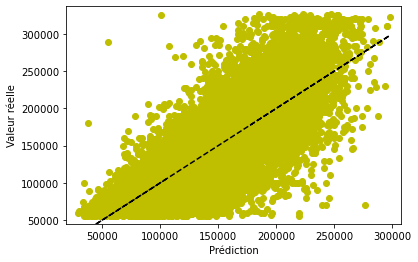

In [9]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlim(x.min()-10000, x.max()+10000)
plt.ylim(y.min()-10000, y.max()+10000)
ax = plt.axes()
ax.set_xlabel('Prédiction')
ax.set_ylabel('Valeur réelle')
print()